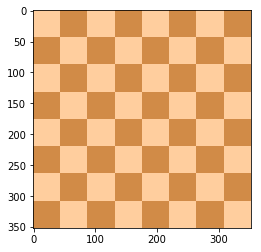

In [18]:
import cv2 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

flat_chess = cv2.imread('images/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

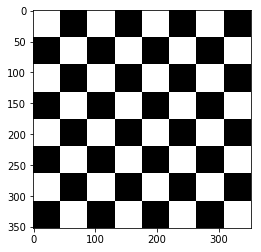

In [19]:
gray_flat=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat, cmap='gray')

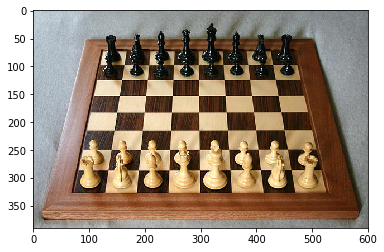

In [36]:
real_chess = cv2.imread('images/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

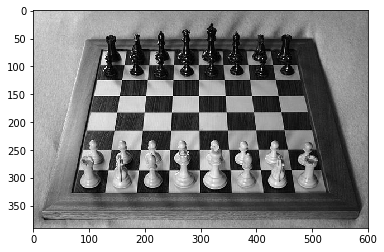

In [37]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

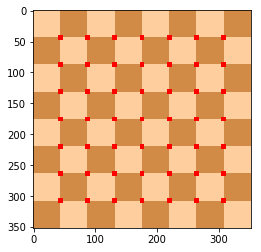

In [28]:
gray= np.float32(gray_flat)
dist=cv2.cornerHarris(src=gray,blockSize=5,ksize=3,k=0.04)
#dilate is errosion
dist=cv2.dilate(dist,None)
flat_chess[dist>0.01*dist.max()]=[255,0,0]

plt.imshow(flat_chess)

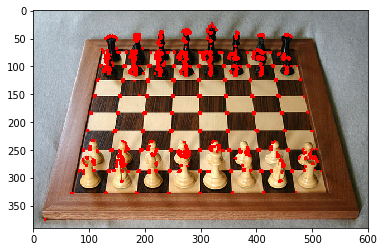

In [41]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=3,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

In [ ]:
#now shitomasi algo

In [53]:
flat_chess = cv2.imread('images/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('images/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [54]:
corner=cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10) #5 no. of corner u want
#to want all corner put value = -1
corner = np.int0(corner) #makes all value to int
for i in corner:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),5,(255,0,0),-1)

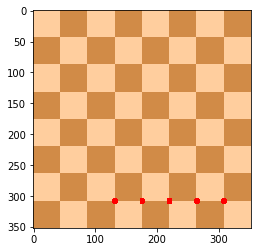

In [55]:
plt.imshow(flat_chess)

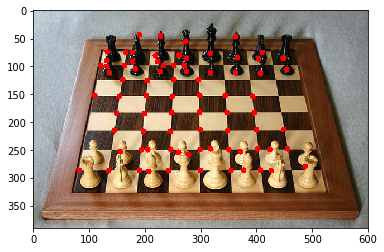

In [56]:
#for real image
corner=cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10) #5 no. of corner u want
#to want all corner put value = -1
corner = np.int0(corner) #makes all value to int
for i in corner:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),5,(255,0,0),-1)
plt.imshow(real_chess)